### Objectives of this notebook:
- display output from ABRM
- perform analysis on output. eg. feature importance and model selection
- in console do: jupyter nbconvert --to="python" '.\Postprocessing.ipynb'
- this will upload the file in pure python format

In [45]:
import numpy as np
import pandas as pd
import plotly.io as pio
import sys
import random 
import datetime
import pathlib

sys.path.append("../")
from training_images.TI_selection import TI_selection
pio.renderers.default = "browser"


### Import data
- one df with FD performance of each particle  
- one df with associated particle position  
- one dicct with initial setup that would allow reproduction of results

In [7]:
dataset = "2020_11_23_19_13"

TI_data = TI_selection(dataset = dataset)

Plotting Training Image 580


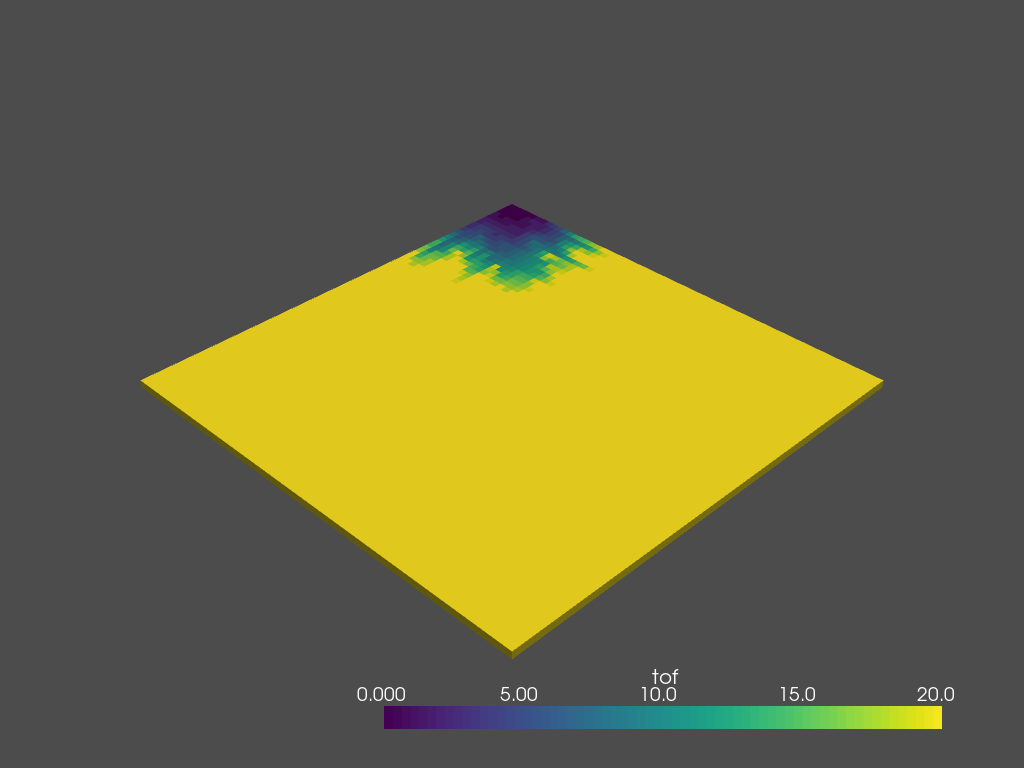

In [41]:
TI_data.plot_best_model(TI_id = 73, random_TI = True, property ="tof")

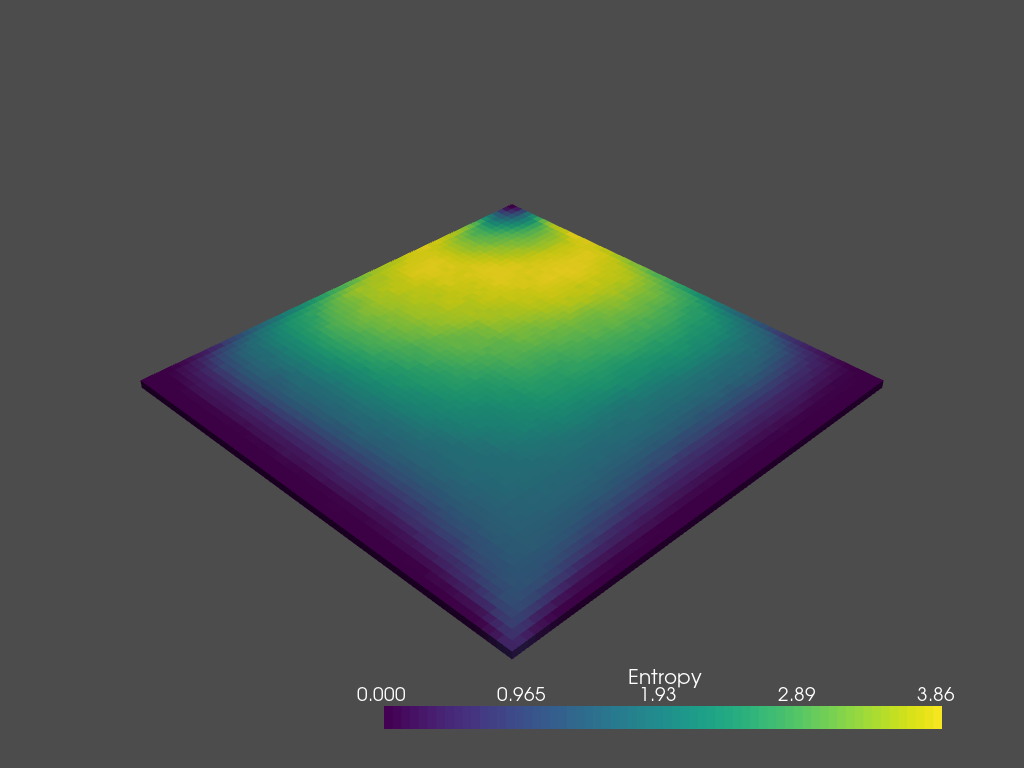

In [40]:
TI_data.plot_tof_entropy()

In [43]:
TI_data.clustering_tof_or_TI_props(cluster_parameter = "tof")

In [5]:
TI_data.cluster_TI_selection()

In [6]:
TI_data.save_best_clustered_TIs()

Path C:\AgentBased_RM\ABRM_functions\training_images\..\..\Output\training_images\TI_1\2020_11_20_16_03\


### Feature importance - model explainability

In [ ]:
import shap
from sklearn.ensemble import RandomForestRegressor


In [ ]:
data.setup_all["2020_09_14_17_35"]["columns"]

In [ ]:
columns = data.setup_all["2020_09_14_17_35"]["columns"]
X_train = data.df_position[columns]
Y_train = data.df_position.LC

In [ ]:
# load JS visualization code to notebook
shap.initjs()

In [ ]:
model = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=10)
model.fit(X_train, Y_train)

In [ ]:
shap_values = shap.TreeExplainer(model).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

In [ ]:
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values[80,:], X_train.iloc[80,:])

In [ ]:
# visualize the training set predictions
shap.force_plot(explainer.expected_value, shap_values, X_train)

In [ ]:
# create a dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot("MatrixpermY", shap_values, X_train)

In [ ]:
shap.summary_plot(shap_values, X_train)
